In [48]:
import networkx as nx
import matplotlib.pyplot as plt
import momepy
import geopandas as gpd
import pandas as pd
import pickle as pkl

In [146]:
mapa = gpd.read_file("D:/Edgar Trejo/Universidad/BioMatematica/Modeling COVID-19 Spreading in the ZMVM/data/rawdata/Censo 2010 (Municipal)/inegi_refcenmuni_2010.shp", 
                    encoding = 'latin')

In [51]:
with open("D:/Edgar Trejo/Universidad/BioMatematica/Modeling COVID-19 Spreading in the ZMVM/data/rawdata/regiones.pkl", "rb") as file:
    regiones = pkl.load(file

In [147]:
zmvm = []
for value in regiones.values():
    zmvm.extend(value)

In [253]:
with open("D:/Edgar Trejo/Universidad/BioMatematica/Modeling COVID-19 Spreading in the ZMVM/data/rawdata/cve_umun.pkl", "wb") as handle:
    pkl.dump(zmvm, handle, protocol=pkl.HIGHEST_PROTOCOL)

In [148]:
mapa = mapa[mapa.cve_umun.isin(zmvm)]

In [154]:
mapa = mapa.iloc[mapa['nom_mun'].str.normalize('NFKD').argsort()]

# remove accents
mapa['nom_mun'] = mapa['nom_mun'].str.normalize('NFKD')\
             .str.encode('ascii', errors='ignore')\
             .str.decode('utf-8')

In [156]:
mapa = mapa.sort_values(by='nom_mun')

In [250]:
mapa.to_file("D:/Edgar Trejo/Universidad/BioMatematica/Modeling COVID-19 Spreading in the ZMVM/data/cleandata/ZMVMmun/mun.shp")

In [157]:
geometry = mapa.geometry

In [158]:
# obtenemos el centroide de la región
centros = geometry.to_crs(epsg=4087).centroid

In [159]:
P = lambda p: (p.x, p.y)

In [160]:
lats = centros.map(P).to_numpy()

In [161]:
pos = {}
for i in range(47):
    pos[mapa.iloc[i, 3]] = lats[i]

In [163]:
data = pd.read_csv("D:/Edgar Trejo/Universidad/BioMatematica/Modeling COVID-19 Spreading in the ZMVM/data/cleandata/viajes_ZMVM.csv",
                  index_col = 0)

In [184]:
casos = pd.read_csv("D:/Edgar Trejo/Universidad/BioMatematica/Modeling COVID-19 Spreading in the ZMVM/data/cleandata/Casos_Diarios_ZMVM_Confirmados.csv",
                  index_col = 1)

In [329]:
mapa.sort_values(by='nom_mun', ignore_index = True)

,gid,cve_ent,nom_mun,cve_umun,no_locs,p_total,pobmas,pobfem,p_0a2,p_0a2_m,...,vph_refri,vph_lavad,vph_autom,vph_pc,vph_telef,vph_cel,vph_inter,nom_ent,rep_pobtot,geometry
0,7,09,Alvaro Obregon,09010,4.0,727034.0,346041.0,380993.0,29724.0,14982.0,...,178043.0,155705.0,95636.0,99625.0,142854.0,152508.0,82006.0,Distrito Federal,Población de 100 mil a 1 millón de habitantes,"POLYGON ((-99.18906 19.39559, -99.18871 19.394..."
1,214,15,Apaxco,15010,18.0,27521.0,13572.0,13941.0,1633.0,832.0,...,5148.0,4155.0,3003.0,1454.0,2047.0,3740.0,816.0,México,Población de 15 mil a 50 mil habitantes,"POLYGON ((-99.11815 20.02704, -99.11815 20.025..."
2,211,15,Atizapan de Zaragoza,15013,7.0,489937.0,238117.0,251810.0,23111.0,11730.0,...,115639.0,100801.0,67103.0,59334.0,88695.0,96627.0,48490.0,México,Población de 100 mil a 1 millón de habitantes,"POLYGON ((-99.26311 19.52747, -99.26307 19.527..."
3,4,09,Azcapotzalco,09002,1.0,414711.0,196053.0,218658.0,14917.0,7688.0,...,107269.0,93517.0,52913.0,60003.0,86750.0,88236.0,47225.0,Distrito Federal,Población de 100 mil a 1 millón de habitantes,"POLYGON ((-99.15718 19.50285, -99.15695 19.502..."
4,5,09,Benito Juarez,09014,1.0,385439.0,176410.0,209029.0,10708.0,5432.0,...,128000.0,111593.0,90655.0,99965.0,113688.0,117126.0,90357.0,Distrito Federal,Población de 100 mil a 1 millón de habitantes,"POLYGON ((-99.14350 19.35724, -99.14386 19.357..."
5,199,15,Chalco,15025,61.0,310130.0,151371.0,158708.0,17947.0,9110.0,...,55801.0,46884.0,23288.0,17115.0,32851.0,48310.0,10829.0,México,Población de 100 mil a 1 millón de habitantes,"POLYGON ((-98.71372 19.31548, -98.71293 19.314..."
6,195,15,Chicoloapan,15029,16.0,175053.0,85372.0,89675.0,9972.0,5015.0,...,39032.0,33316.0,16577.0,14381.0,22928.0,33635.0,9239.0,México,Población de 100 mil a 1 millón de habitantes,"POLYGON ((-98.79921 19.40503, -98.79938 19.404..."
7,193,15,Chimalhuacan,15031,6.0,614453.0,302295.0,312155.0,39176.0,19929.0,...,105984.0,87133.0,36237.0,24342.0,62097.0,86344.0,14592.0,México,Población de 100 mil a 1 millón de habitantes,"POLYGON ((-98.96381 19.37372, -98.96412 19.373..."
8,204,15,Coacalco de Berriozabal,15020,4.0,278064.0,134138.0,143920.0,11937.0,6223.0,...,70578.0,63626.0,36524.0,38610.0,54999.0,60510.0,28479.0,México,Población de 100 mil a 1 millón de habitantes,"POLYGON ((-99.12384 19.64241, -99.12370 19.642..."
9,12,09,Coyoacan,09003,1.0,620416.0,292491.0,327925.0,19766.0,10166.0,...,163866.0,144710.0,100606.0,106537.0,141149.0,140916.0,90947.0,Distrito Federal,Población de 100 mil a 1 millón de habitantes,"POLYGON ((-99.18079 19.34714, -99.18076 19.347..."


In [186]:
pob = casos.poblacion

In [165]:
G = nx.Graph()

for i in range(47):
    for j in range(47):
        u = mapa.iloc[i, 3]
        v = mapa.iloc[j, 3]
        if i == j:
            pass
        else:
            G.add_edge(u, v)
            G[u][v]['weight'] = data.iloc[i, j]

In [327]:
dataD.sum(axis = 0).sort_values(ascending = False)

Iztapalapa                     2756784
Ecatepec de Morelos            2480841
Cuauhtemoc                     1989847
Gustavo A. Madero              1787816
Nezahualcoyotl                 1544815
Coyoacan                       1366661
Naucalpan de Juarez            1222793
Miguel Hidalgo                 1175001
Tlalpan                        1016171
Benito Juarez                  1011424
Alvaro Obregon                  932452
Venustiano Carranza             881633
Tlalnepantla de Baz             875528
Chimalhuacan                    754287
Xochimilco                      712970
Ixtapaluca                      696465
Atizapan de Zaragoza            680111
Iztacalco                       612766
Cuautitlan Izcalli              611995
Azcapotzalco                    603509
Tultitlan                       578970
Tlahuac                         559690
Tecamac                         537257
La Magdalena Contreras          536839
Texcoco                         477447
Chalco                   

In [268]:
entradas =  dataD.sum(axis = 0).to_numpy()

In [168]:
dataD = data.iloc[:, :47]

In [321]:
entradas = entradas/entradas.sum()

In [269]:
salidas = dataD.sum(axis = 1).to_numpy()

In [320]:
salidas = salidas/salidas.sum()

In [246]:
labels = {}

for i in range(47):
    labels[mapa.iloc[i, 3]] = '{}'.format(i+1)

In [323]:
labels

{'09010': '1',
 '15010': '2',
 '15013': '3',
 '09002': '4',
 '09014': '5',
 '15025': '6',
 '15029': '7',
 '15031': '8',
 '15020': '9',
 '09003': '10',
 '09004': '11',
 '09015': '12',
 '15024': '13',
 '15121': '14',
 '15033': '15',
 '09005': '16',
 '15035': '17',
 '15037': '18',
 '15039': '19',
 '09006': '20',
 '09007': '21',
 '15044': '22',
 '09008': '23',
 '15070': '24',
 '09016': '25',
 '09009': '26',
 '15057': '27',
 '15058': '28',
 '15060': '29',
 '15068': '30',
 '15081': '31',
 '15083': '32',
 '15091': '33',
 '15092': '34',
 '15095': '35',
 '15099': '36',
 '15100': '37',
 '13069': '38',
 '09011': '39',
 '15104': '40',
 '09012': '41',
 '15108': '42',
 '15109': '43',
 '15122': '44',
 '09017': '45',
 '09013': '46',
 '15120': '47'}

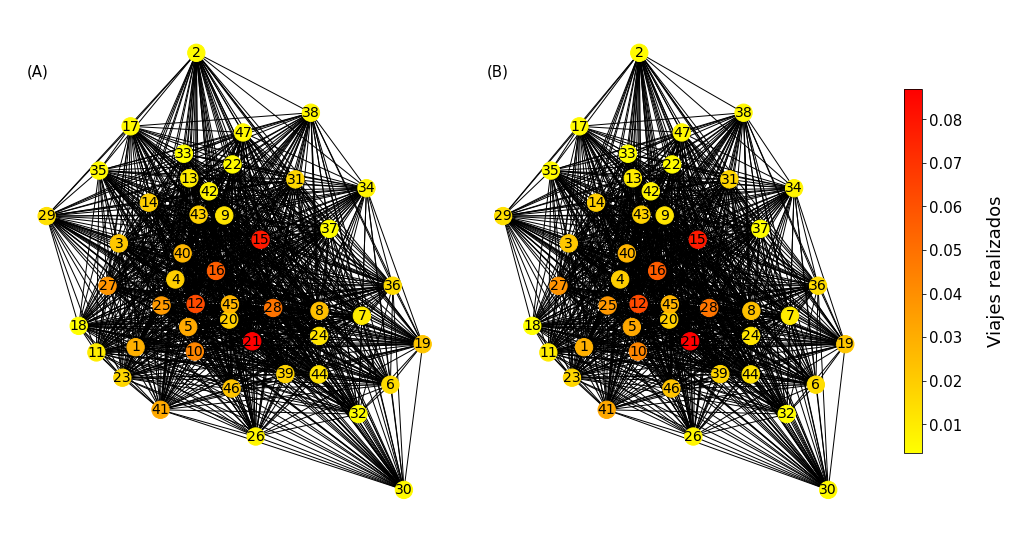

In [322]:
import numpy as np
fig, ax = plt.subplots(1, 2)

alldata = np.concatenate((salidas, entradas))
vmax = alldata.max()
vmin = alldata.min()

nx.draw(G, ax=ax[0], pos = pos, labels = labels, node_color = salidas, font_size=14, font_color="k", cmap ="autumn_r",
       vmin = vmin, vmax=vmax)
nx.draw(G, ax=ax[1], pos = pos, labels = labels, node_color = entradas, font_size=14, font_color="k", cmap ="autumn_r",
       vmin = vmin, vmax=vmax)

fig.set_size_inches(14, 8)
sm = plt.cm.ScalarMappable(cmap="autumn_r", norm=plt.Normalize(vmin = vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm, fraction = 0.04)
cbar.ax.tick_params(labelsize=15) 
cbar.set_label(label='\nViajes realizados', fontsize=18)

ax[0].annotate('(A)', xy=(20, 460), xycoords = 'axes points', fontsize = 15)
ax[1].annotate('(B)', xy=(20, 460), xycoords = 'axes points', fontsize = 15)

fig.tight_layout(pad = 0.5)
plt.show()